In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
pls = pd.read_csv('placement.csv')
pls

,cgpa,package
0,7.85,9.72
1,9.12,7.89
2,6.54,5.14
3,8.99,15.30
4,7.01,6.62
...,...,...
96,9.07,19.40
97,6.92,6.36
98,7.81,9.61
99,8.38,13.62


<Axes: xlabel='cgpa', ylabel='package'>

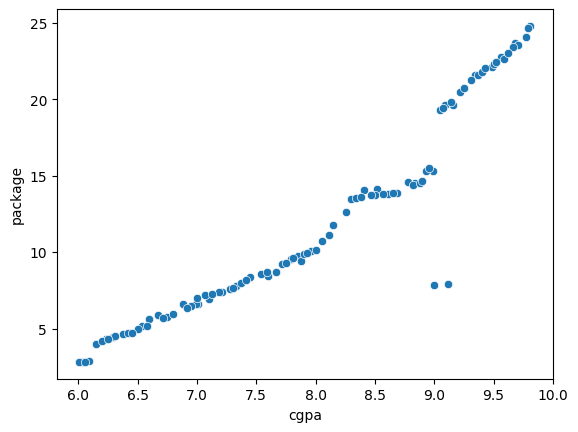

In [81]:
sns.scatterplot(x='cgpa', y='package', data=pls)

In [82]:
x = pls.iloc[:,0:1]
y = pls.iloc[:,-1]

In [83]:
x

,cgpa
0,7.85
1,9.12
2,6.54
3,8.99
4,7.01
...,...
96,9.07
97,6.92
98,7.81
99,8.38


In [84]:
y

0       9.72
1       7.89
2       5.14
3      15.30
4       6.62
       ...  
96     19.40
97      6.36
98      9.61
99     13.62
100    22.46
Name: package, Length: 101, dtype: float64

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [86]:
lr = LinearRegression()

In [87]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [88]:
X_test

,cgpa
26,7.33
86,7.13
2,6.54
55,8.57
75,8.88
94,7.30
16,7.45
73,6.06
54,7.19
96,9.07


In [89]:
y_test

26     7.80
86     7.29
2      5.14
55    13.78
75    14.52
94     7.68
16     8.36
73     2.82
54     7.36
96    19.40
53     4.46
93     4.32
78     8.20
13    23.67
7     13.45
30     6.63
22     9.54
24    23.51
33     4.98
8      8.70
43    10.72
Name: package, dtype: float64

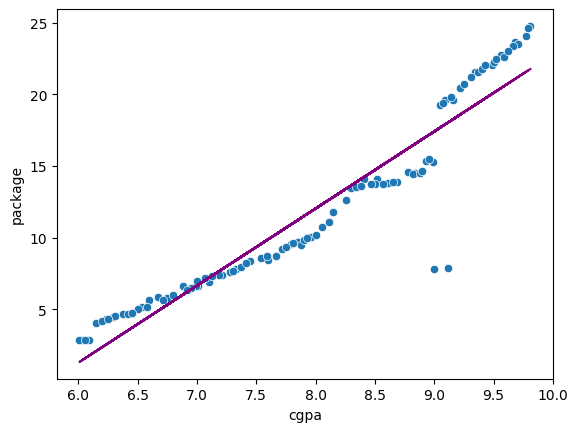

In [90]:
sns.scatterplot(x='cgpa', y='package', data=pls)
plt.plot(X_train,lr.predict(X_train),color='purple')

In [91]:
m = lr.coef_
c = lr.intercept_
print('value of m is:',m)
print('value of c is:',c)

value of m is: [5.38549765]
value of c is: -31.053012350377823


In [92]:
# y = mx + c

y_pred = lr.predict(X_test)
y_pred

array([ 8.42268545,  7.34558591,  4.1681423 , 15.10070253, 16.77020681,
        8.26112052,  9.06894516,  1.58310343,  7.66871577, 17.79345136,
        2.82176789,  2.60634798,  8.85352526, 21.07860493, 13.64661817,
        5.9992115 , 10.90001437, 21.24016986,  3.95272239, 10.25375465,
       12.30024376])

In [93]:
print(m * 7.33 + c)
print(m * 7.13 + c)

[8.42268545]
[7.34558591]


In [94]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_log_error(y_test,y_pred)))
print('Adjusted r2 score',1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x.shape[1]-1))

MAE: 1.1846950815428048
MSE: 1.874157945954488
RMSE: 1.3689988845702132
R2 Score: 0.9446980754315499
RMSE: 0.17341924136868173
Adjusted r2 score 0.9417874478226842


In [95]:
# Create new DataFrame and add IQ column
new_df2 = pls.copy()  # Replace pls with df (or provide pls if different)
n_rows = len(new_df2)  # Dynamically get number of rows
new_df2['iq'] = new_df2['package'] + np.round(np.random.randint(-12, 12, n_rows) / 10, 2)  # Round noise to 2 decimals
new_df2 = new_df2[['cgpa', 'iq', 'package']]  # Reorder columns

# Verify IQ column (check rounding)
print("Sample of new_df2 with IQ column:")
print(new_df2.head())

Sample of new_df2 with IQ column:
   cgpa     iq  package
0  7.85   9.52     9.72
1  9.12   7.79     7.89
2  6.54   4.14     5.14
3  8.99  16.40    15.30
4  7.01   7.02     6.62


In [96]:
new_df2

,cgpa,iq,package
0,7.85,9.52,9.72
1,9.12,7.79,7.89
2,6.54,4.14,5.14
3,8.99,16.40,15.30
4,7.01,7.02,6.62
...,...,...,...
96,9.07,19.80,19.40
97,6.92,7.46,6.36
98,7.81,9.01,9.61
99,8.38,13.62,13.62


In [97]:
X2 = new_df2.iloc[:,0:2]
y2 = new_df2.iloc[:,-1]

In [100]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state=2)

In [101]:
lr = LinearRegression()
lr.fit(X2_train,y2_train)
y2_pred = lr.predict(X2_test)

In [103]:
print('Before random iq')
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score",r2_score(y_test,y_pred))
print('Adjusted r2 score',1-(1-r2_score(y_test,y_pred))*(len(y_test)-1)/(len(y_test)-x.shape[1]-1))
print('--'*70)
print('After random iq')
print("MAE",mean_absolute_error(y2_test,y2_pred))
print("MSE",mean_squared_error(y2_test,y2_pred))
print("RMSE",np.sqrt(mean_squared_error(y2_test,y2_pred)))
print("R2 Score",r2_score(y2_test,y2_pred))
print('Adjusted r2 score',1-(1-r2_score(y2_test,y2_pred))*(len(y2_test)-1)/(len(y2_test)-X2.shape[1]-1))

Before random iq
MAE 0.7563189395490089
MSE 0.7255430598778986
RMSE 0.8517881543423216
R2 Score 0.985571999236144
Adjusted r2 score 0.9848126307748885
--------------------------------------------------------------------------------------------------------------------------------------------
After random iq
MAE 0.7563189395490089
MSE 0.7255430598778986
RMSE 0.8517881543423216
R2 Score 0.985571999236144
Adjusted r2 score 0.98396888804016
